In [ ]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import matplotlib.image as image
from google.colab.patches import cv2_imshow

In [ ]:
saveSigma = list()
saveMean = list()
matrixTotal = list() #Tạo ma trận để chứa các ma trận chứa các eigenvector (chứa matrixB của 3 kênh RGB)
percentEx = list() # tạo ma trận để chứa tỉ lệ dữ liệu đc giữ lại trong m eigenvector đã chọn đc của 3 kênh RGB

In [ ]:
def meanAndSigmaCalc(arr):
    sum = 0
    sumSquare = 0

    for i in arr:
        sum = sum + i
        sumSquare = sumSquare + i * i
    return sum/(len(arr)), math.sqrt(sumSquare/(len(arr))) - (sum/(len(arr)))*(sum/(len(arr)))

In [ ]:
#Standardize matrix
def standardize(matrix):
    for line in matrix: # Chạy từng hàng trong ma trận ban đầu
        mean, sigma = meanAndSigmaCalc(line) # Tính mean, sigma của hàng
        saveMean.append(mean) #Lưu mean vào 1 ma trận để bước cuối reconstruct
        saveSigma.append(sigma)#Lưu sigma vào 1 ma trận để bước cuối reconstruct
        for i in range(0, len(line)):
            line[i] = (line[i] - mean)/ sigma #Giá trị sau khi chuẩn hóa = (Xcũ - mean)/ sigma

In [ ]:
def PCA_Algorithm(matrix, m): #PCA giảm  chiều ma trận về m
    #Step 1: Standardize matrix
    standardize(matrix)
    #Step 2: Compute covariance matrix
    covMatrix = np.matmul(matrix, np.transpose(matrix)) / matrix.shape[1] # Tính covariance matrix = (1/n)*Matrix*Transpose(Matrix)
    #Step 3: compute eigenvector, eigenvalue
    eigenValue, eigenVector = eig(covMatrix)#Tính eigenValue vs eigenvector của ma trận covariance
    
    idx = np.argsort(eigenValue) #sắp sếp eigen value theo thứ tự giảm dần
    idx = idx[::-1]
    eigenVector = eigenVector[:, idx]
    eigenValue = eigenValue[idx]#sắp sếp eigen vector theo thứ tự giảm dần
    tmp = list()
    for i in range(0, len(eigenValue)):
        tmp.append(sum(eigenValue[:i]) / sum(eigenValue))#

    percentEx.append(tmp)
  #Step 4: Project X on prjection matrix B
    matrixB = list()
    for line in eigenVector: #gán các eigenvector theo thứ tự giảm dần vào ma trận B
        temp = list()
        for i in range(0, m):
            temp.append(line[i])
        matrixB.append(temp)
    matrixTotal.append(matrixB)
    return np.matmul(np.transpose(matrixB), matrix) #Trả về ma trận đã giảm chiều = transpose(matrixB)*matrix
   # return projMatrix

In [ ]:
def reconstruct(matrix):
    for lineIdx in range(0, len(matrix)):
        for i in range(0, len(matrix[lineIdx])):
            matrix[lineIdx][i] = matrix[lineIdx][i]*saveSigma[lineIdx] + saveMean[lineIdx]

Shape của ảnh:  (582, 880, 3)
Tổng số pixel:  1536480


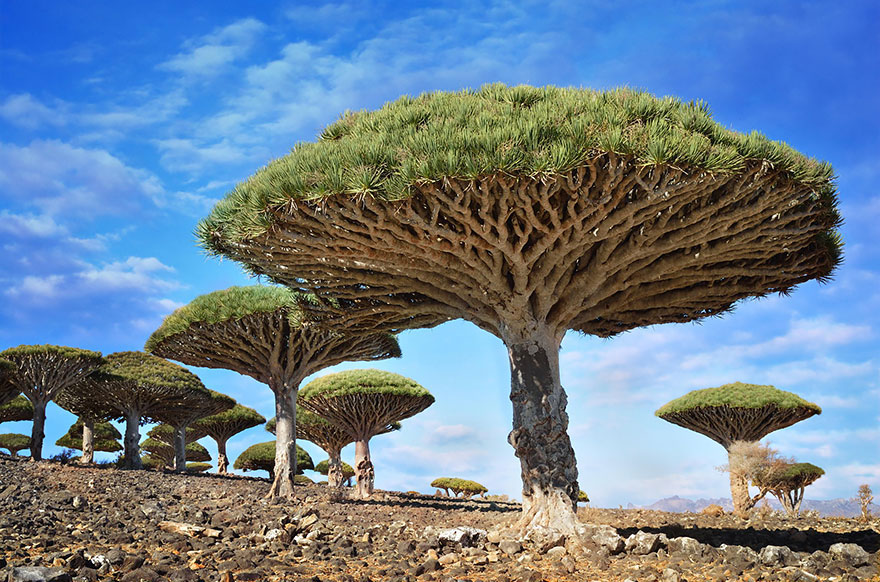

-1

In [ ]:
img = image.imread("cay.jpg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Shape của ảnh: ",RGB_img.shape)
print("Tổng số pixel: ", RGB_img.size)
cv2_imshow(RGB_img)
cv2.waitKey(0)

In [ ]:
blue, green, red = cv2.split(RGB_img)
print("Ma trận màu Blue:")
print(blue)
print("Ma trận màu Green:")
print(green)
print("Ma trận màu Red:")
print(red)

Ma trận màu Blue:
[[215 214 215 ... 214 214 214]
 [215 214 215 ... 214 214 215]
 [214 214 215 ... 214 215 215]
 ...
 [123  83  59 ...  29  76  81]
 [ 66  71  84 ...  55  75  44]
 [ 24  45  61 ...  67  10  50]]
Ma trận màu Green:
[[ 89  88  87 ... 103 103 103]
 [ 89  88  87 ... 103 103 104]
 [ 88  88  87 ... 103 104 104]
 ...
 [146 109  85 ... 145 190 174]
 [ 76  81  93 ... 153 167 114]
 [ 28  49  61 ... 148  82  97]]
Ma trận màu Red:
[[ 24  23  22 ...  55  55  55]
 [ 24  23  22 ...  55  55  56]
 [ 23  23  22 ...  55  56  56]
 ...
 [162 123  97 ... 200 243 230]
 [ 94  98 107 ... 199 214 167]
 [ 46  67  77 ... 186 122 141]]


In [ ]:
blue, green, red = blue / 255, green / 255, red / 255#Chuẩn hóa các giá trị pixel về khoảng (0 ~ 1)
print("Blue :")
print(blue)
print("Green :")
print(green)
print("Red :")
print(red)

Blue :
[[0.84313725 0.83921569 0.84313725 ... 0.83921569 0.83921569 0.83921569]
 [0.84313725 0.83921569 0.84313725 ... 0.83921569 0.83921569 0.84313725]
 [0.83921569 0.83921569 0.84313725 ... 0.83921569 0.84313725 0.84313725]
 ...
 [0.48235294 0.3254902  0.23137255 ... 0.11372549 0.29803922 0.31764706]
 [0.25882353 0.27843137 0.32941176 ... 0.21568627 0.29411765 0.17254902]
 [0.09411765 0.17647059 0.23921569 ... 0.2627451  0.03921569 0.19607843]]
Green :
[[0.34901961 0.34509804 0.34117647 ... 0.40392157 0.40392157 0.40392157]
 [0.34901961 0.34509804 0.34117647 ... 0.40392157 0.40392157 0.40784314]
 [0.34509804 0.34509804 0.34117647 ... 0.40392157 0.40784314 0.40784314]
 ...
 [0.57254902 0.42745098 0.33333333 ... 0.56862745 0.74509804 0.68235294]
 [0.29803922 0.31764706 0.36470588 ... 0.6        0.65490196 0.44705882]
 [0.10980392 0.19215686 0.23921569 ... 0.58039216 0.32156863 0.38039216]]
Red :
[[0.09411765 0.09019608 0.08627451 ... 0.21568627 0.21568627 0.21568627]
 [0.09411765 0.090

In [ ]:
m = int(input("Nhập m: "))

Nhập m: 30


In [ ]:
# PCA_algorithm sẽ trả về ma trận Z

pca_b_trans = PCA_Algorithm(blue, m)                      # Ma trận Z của kênh blue
print("\nShape của ma trận :", pca_b_trans.shape)
print("Ma trận màu Blue sau khi giảm chiều: ")
print(pca_b_trans)


pca_r_trans = PCA_Algorithm(red, m)                       # Ma trận Z của kênh red
print("\nShape của ma trận :", pca_r_trans.shape)                    
print("Ma trận màu Red sau khi giảm chiều: ")
print(pca_r_trans)


pca_g_trans = PCA_Algorithm(green, m)                     # Ma trận Z của kênh green
print("\nShape của ma trận :", pca_g_trans.shape)
print("Ma trận màu Green sau khi giảm chiều: ")
print(pca_g_trans)


Shape của ma trận : (30, 880)
Ma trận màu Blue sau khi giảm chiều: 
[[-20.79644427 -20.84859768 -21.14459028 ...  -9.19027995  -9.18521794
   -9.13001538]
 [ -3.31580115  -3.42276766  -3.31483112 ... -19.93578539 -20.04004071
  -20.14373888]
 [  0.85820147   0.84916078   0.63379028 ...   4.09037723   4.11829485
    4.12188626]
 ...
 [  2.25082039   2.06717926   1.81151335 ...  -0.84013007  -0.97239802
   -1.0076175 ]
 [  2.69260693   2.38285755   2.42019558 ...   0.93773909   0.80661776
    0.08057854]
 [  0.83780047   0.57277766   0.8619045  ...  -0.30038992  -0.42248918
   -0.19910712]]

Shape của ma trận : (30, 880)
Ma trận màu Red sau khi giảm chiều: 
[[-12.67955888 -12.90341359 -13.47785766 ...   0.63361935   1.04357432
    1.36500664]
 [ -1.86136617  -2.27930455  -2.71269934 ...  -5.98696849  -5.7398192
   -5.56807771]
 [  3.69303643   3.83951918   4.2304632  ...   2.64617677   2.7998099
    2.81058256]
 ...
 [ -1.10169076  -0.94305404  -0.49962835 ...  -0.02263902   0.20495218


In [ ]:
#dùng ma trận B nhân vs ma trận Z ta sẽ đc ma trận X~

pca_b_compressed = np.matmul(matrixTotal[0],pca_b_trans)
pca_r_compressed = np.matmul(matrixTotal[1],pca_r_trans)
pca_g_compressed = np.matmul(matrixTotal[2],pca_g_trans)

In [ ]:
#reconstruct X~ để tái tạo lại ảnh gốc

reconstruct(pca_b_compressed)
print("Ma trận màu Blue sau khi được reconstruct: ")
print(pca_b_compressed)


reconstruct(pca_r_compressed)
print("\nMa trận màu Red sau khi được reconstruct: ")
print(pca_r_compressed)


reconstruct(pca_g_compressed)
print("\nMa trận màu Green sau khi được reconstruct: ")
print(pca_g_compressed)


Ma trận màu Blue sau khi được reconstruct: 
[[0.84512913 0.84488826 0.84412948 ... 0.84957281 0.84942387 0.84986954]
 [0.84629247 0.84641261 0.8456989  ... 0.85095664 0.85082249 0.85120099]
 [0.8464401  0.8471569  0.84673358 ... 0.85084423 0.85080769 0.85157564]
 ...
 [0.31468122 0.30731361 0.29495517 ... 0.31342647 0.3068112  0.33695347]
 [0.28149926 0.28741229 0.2783362  ... 0.2461323  0.23771188 0.26858541]
 [0.16598745 0.18000015 0.1794777  ... 0.22774944 0.2267688  0.24590411]]

Ma trận màu Red sau khi được reconstruct: 
[[0.81681338 0.81935749 0.81401733 ... 0.87477126 0.87462644 0.87683182]
 [0.81575161 0.81843209 0.8126293  ... 0.87385102 0.87363257 0.87579684]
 [0.8154724  0.81809271 0.81234356 ... 0.87275855 0.87262683 0.87483763]
 ...
 [0.34358944 0.34855308 0.36242769 ... 0.50624949 0.48476729 0.45186424]
 [0.31799097 0.3305077  0.35591969 ... 0.40884352 0.39595335 0.3669477 ]
 [0.2143573  0.24496076 0.28386493 ... 0.35745835 0.35858105 0.34412294]]

Ma trận màu Green sau k

(582, 880, 3)
[[[0.84512913 0.82887266 0.81681338]
  [0.84488826 0.82963707 0.81935749]
  [0.84412948 0.82646311 0.81401733]
  ...
  [0.84957281 0.8464468  0.87477126]
  [0.84942387 0.84614328 0.87462644]
  [0.84986954 0.84770222 0.87683182]]

 [[0.84629247 0.82805776 0.81575161]
  [0.84641261 0.82931832 0.81843209]
  [0.8456989  0.8260386  0.8126293 ]
  ...
  [0.85095664 0.8462267  0.87385102]
  [0.85082249 0.84582997 0.87363257]
  [0.85120099 0.84748513 0.87579684]]

 [[0.8464401  0.82827865 0.8154724 ]
  [0.8471569  0.82977206 0.81809271]
  [0.84673358 0.82642174 0.81234356]
  ...
  [0.85084423 0.84676045 0.87275855]
  [0.85080769 0.84648074 0.87262683]
  [0.85157564 0.84830925 0.87483763]]

 ...

 [[0.31468122 0.27228367 0.34358944]
  [0.30731361 0.26595238 0.34855308]
  [0.29495517 0.28274141 0.36242769]
  ...
  [0.31342647 0.45229723 0.50624949]
  [0.3068112  0.44478223 0.48476729]
  [0.33695347 0.4322336  0.45186424]]

 [[0.28149926 0.19373461 0.31799097]
  [0.28741229 0.2078194

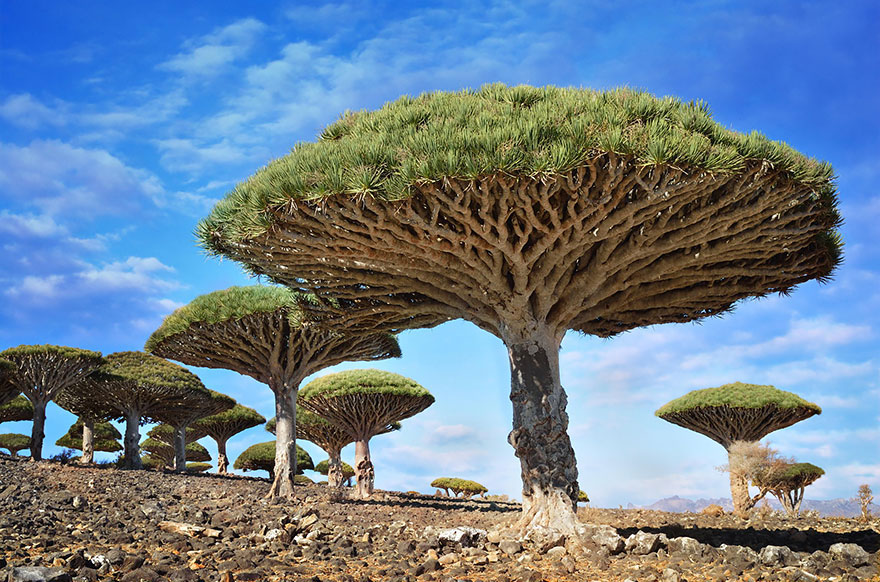

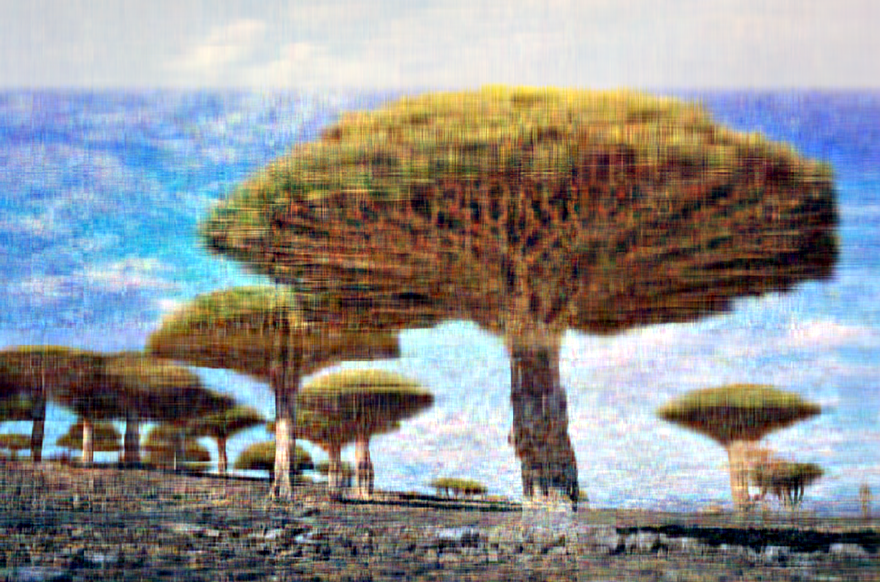

In [ ]:
img_compressed = cv2.merge((pca_b_compressed, pca_g_compressed, pca_r_compressed))
print(img_compressed.shape)
print(img_compressed)

cv2_imshow(RGB_img)
cv2_imshow(np.floor(img_compressed*255))

Blue Channel when m =  30 : 0.889900078357229
Red Channel when m =  30  : 0.6988114708934728
Green Channel when m =  30  : 0.7903837111372316
566.8497612733686


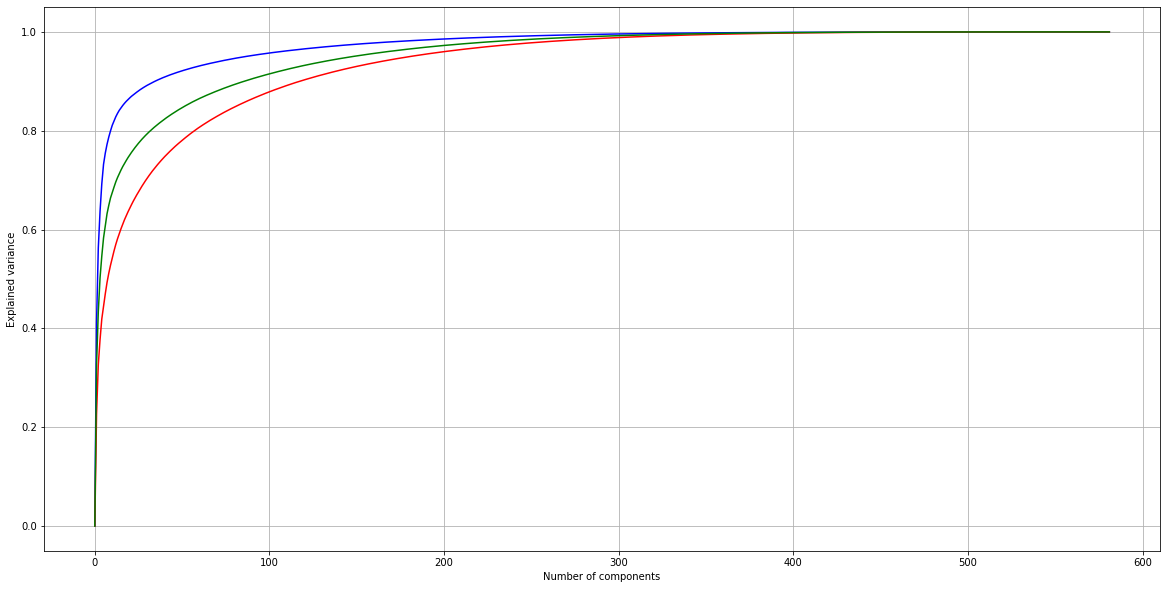

In [ ]:
#Tính % số dữ liệu mà m eigenvector lưu lại đc

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.grid()
plt.plot(percentEx[0], color = 'blue')

plt.plot(percentEx[1], color = 'red')

plt.plot(percentEx[2], color = 'green')

plt.xlabel("Number of components")
plt.ylabel("Explained variance")


print(f"Blue Channel when m = ",m,":" ,percentEx[0][m-1])
print(f"Red Channel when m = ",m," :" ,percentEx[1][m-1])
print(f"Green Channel when m = ",m," :" ,percentEx[2][m-1])

print(sum(percentEx[0]))